In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


plt.style.use('dark_background')

/tmp/ipykernel_7482/3561430413.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


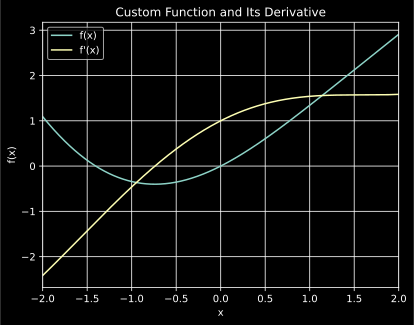

In [2]:
# Define a range for x
x_values = np.linspace(-2, 2, 2001)

# Define a custom function and its derivative
def customFunction(x):
    return np.sin(x) + 0.5 * x ** 2

def customDerivative(x):
    return np.cos(x) + x

# Plot the function and its derivative
plt.plot(x_values, customFunction(x_values), x_values, customDerivative(x_values))
plt.xlim(x_values[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'f\'(x)'])
plt.title('Custom Function and Its Derivative')
plt.show()


In [3]:
# Random starting point
initial_point = np.random.choice(x_values, 1)
print(initial_point)

# Learning rate and training epochs
learning_rate = 0.01
training_epochs = 700

# Perform gradient descent to find a local minimum
for epoch in range(training_epochs):
    gradient = customDerivative(initial_point)
    initial_point = initial_point - learning_rate * gradient

initial_point


[1.564]


array([-0.7390412])

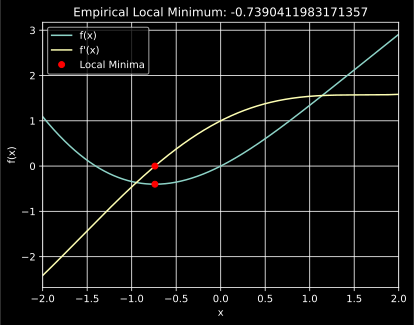

In [4]:
# Plot the results
plt.plot(x_values, customFunction(x_values), x_values, customDerivative(x_values))
plt.plot(initial_point, customDerivative(initial_point), 'ro')
plt.plot(initial_point, customFunction(initial_point), 'ro')

plt.xlim(x_values[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'f\'(x)', 'Local Minima'])
plt.title('Empirical Local Minimum: %s' % initial_point[0])
plt.show()


In [5]:
# Random starting point
initial_point = np.random.choice(x_values, 1)

# Learning rate and training epochs
learning_rate = 0.05
training_epochs = 100

# Run through training and store all the results
model_params = np.zeros((training_epochs, 2))
for epoch in range(training_epochs):
    gradient = customDerivative(initial_point)
    initial_point = initial_point - learning_rate * gradient
    model_params[epoch, 0] = initial_point
    model_params[epoch, 1] = gradient


/tmp/ipykernel_7482/469723255.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model_params[epoch, 0] = initial_point
/tmp/ipykernel_7482/469723255.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model_params[epoch, 1] = gradient


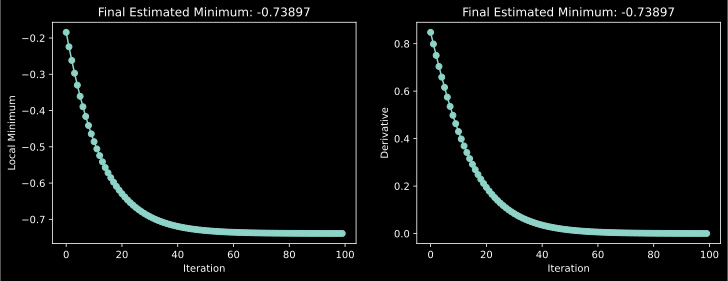

In [6]:
# Plot the gradient descent progress
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(model_params[:, i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final Estimated Minimum: {initial_point[0]:.5f}')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')

plt.show()


/tmp/ipykernel_7482/2531473125.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


Found Minimum: -0.7448756885175289
Iterations: 189


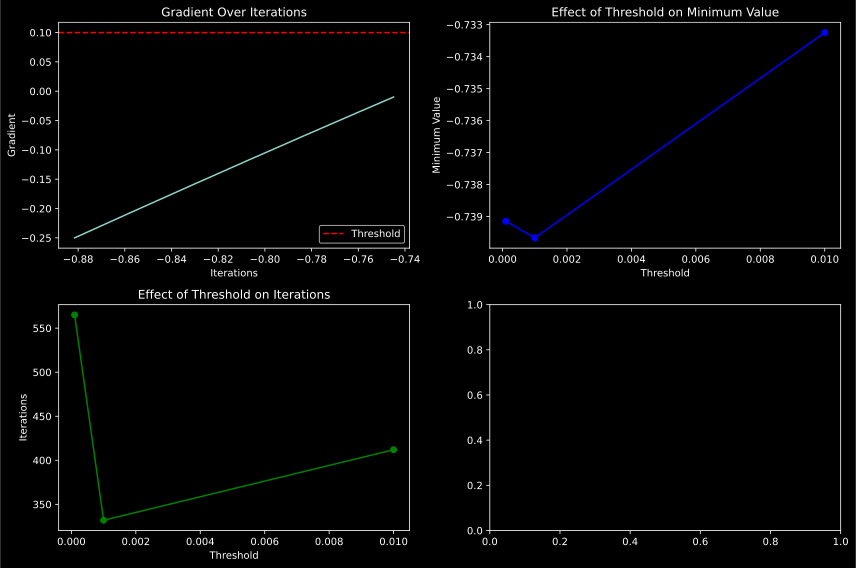

In [13]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

# Define a range for x
x_values = np.linspace(-2, 2, 2001)

# Define a custom function and its derivative
def customFunction(x):
    return np.sin(x) + 0.5 * x ** 2

def customDerivative(x):
    return np.cos(x) + x

def findLocalMinimumWithThreshold(learning_rate, threshold):
    # Random starting point
    initial_point = np.random.choice(x_values, 1)
    
    # Initialize variables
    gradient = customDerivative(initial_point)
    iteration = 0
    x_history = []
    gradient_history = []

    # Run through training until the derivative magnitude is smaller than the threshold
    while np.abs(gradient) > threshold:
        gradient = customDerivative(initial_point)
        initial_point = initial_point - learning_rate * gradient
        iteration += 1
        x_history.append(initial_point[0])
        gradient_history.append(gradient)

    return initial_point, iteration, x_history, gradient_history

# 1) Modify the code to end training when the derivative is smaller than a threshold (e.g., 0.1)
learning_rate = 0.01
threshold = 0.01
found_minima, iterations, x_history, gradient_history = findLocalMinimumWithThreshold(learning_rate, threshold)
print("Found Minimum:", found_minima[0])
print("Iterations:", iterations)

# 2) Explore the accuracy of the result with different threshold values
thresholds_to_test = [0.01, 0.001, 0.0001]
results = []

for threshold in thresholds_to_test:
    found_minima, iterations, _, _ = findLocalMinimumWithThreshold(learning_rate, threshold)
    results.append((threshold, found_minima[0], iterations))

# 3) Potential problems when the stopping criterion is based on the derivative
# - The choice of threshold can impact the accuracy and convergence speed.
# - Negative derivatives may cause unexpected behavior. Adding safeguards is essential.
# - The derivative may become very small near local minima, leading to early termination.

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot for Question 1
axes[0, 0].plot(x_history, gradient_history)
axes[0, 0].set_xlabel('Iterations')
axes[0, 0].set_ylabel('Gradient')
axes[0, 0].set_title('Gradient Over Iterations')
axes[0, 0].axhline(y=0.1, color='r', linestyle='--', label='Threshold')
axes[0, 0].legend()

# Plot for Question 2
threshold_values = [result[0] for result in results]
minimum_values = [result[1] for result in results]
iterations_values = [result[2] for result in results]

axes[0, 1].plot(threshold_values, minimum_values, marker='o', linestyle='-', color='b')
axes[0, 1].set_xlabel('Threshold')
axes[0, 1].set_ylabel('Minimum Value')
axes[0, 1].set_title('Effect of Threshold on Minimum Value')

axes[1, 0].plot(threshold_values, iterations_values, marker='o', linestyle='-', color='g')
axes[1, 0].set_xlabel('Threshold')
axes[1, 0].set_ylabel('Iterations')
axes[1, 0].set_title('Effect of Threshold on Iterations')

# Plot for Question 3 (No specific plot needed for this question)

plt.tight_layout()
plt.show()
